In [0]:
import pyspark.sql.functions as sf
from pyspark.sql.functions import *
from pyspark.sql import Window
from pyspark.sql.types import IntegerType, DoubleType, BooleanType, DateType
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%fs ls "/mnt/tokyoolymic/"

path,name,size,modificationTime
dbfs:/mnt/tokyoolymic/raw-data/,raw-data/,0,1694666001000
dbfs:/mnt/tokyoolymic/transformed-data/,transformed-data/,0,1694666008000


In [0]:
df_athletes = (spark.read.format("csv")
               .options(header = "true", inferSchema ="true")
               .load("/mnt/tokyoolymic/raw-data/athletes.csv")
               )

In [0]:
# Identifying countries with more Athletes and ranking countries based on Athletes Count
df_athletes_countries = (df_athletes
                         .dropDuplicates()
                         .groupBy("Country")
                         .agg(sf.countDistinct("PersonName").alias("Number_of_Athletes"))
                         .withColumn("CountryRanking_AthletesCount", sf.rank().over(Window.orderBy(sf.col("Number_of_Athletes").desc())))
                         )

display(df_athletes_countries)

# Athletes from "United States of America" participated more in Tokyo Olympics

Country,Number_of_Athletes,CountryRanking_AthletesCount
United States of America,614,1
Japan,585,2
Australia,470,3
Germany,399,4
People's Republic of China,398,5
France,377,6
Canada,368,7
Great Britain,366,8
Italy,354,9
Spain,324,10


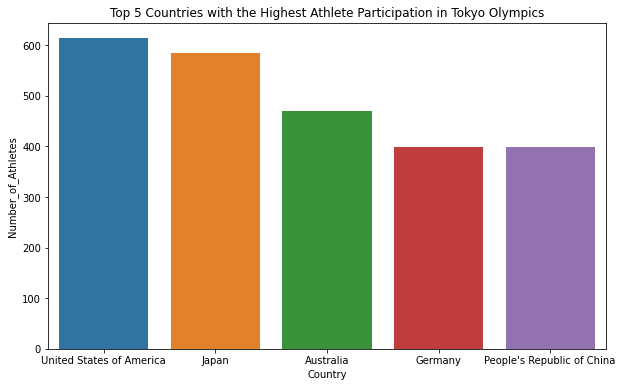

In [0]:
# Visualization of first 5 countries with more Athletes
df_five_country_athletes = (df_athletes_countries
                            .where(sf.col("CountryRanking_AthletesCount").isin(1,2,3,4,5)))

df_athletes_pd = df_five_country_athletes.toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x = "Country", y = "Number_of_Athletes", data = df_athletes_pd)
plt.title('Top 5 Countries with the Highest Athlete Participation in Tokyo Olympics')
plt.show()

In [0]:
#disciplines having highest participation or number of Athletes participating
df_athletes_discipline = (df_athletes
                          .dropDuplicates()
                         .groupBy("Discipline")
                         .agg(sf.countDistinct("PersonName").alias("Athletes_Participation_Count"))
                         .withColumn("DisciplineRanking_AthletesCount", sf.rank().over(Window.orderBy(sf.col("Athletes_Participation_Count").desc())))
                         )
# "Athletics" discipline has the highest participation rate followed by "Swimming" and "Football"

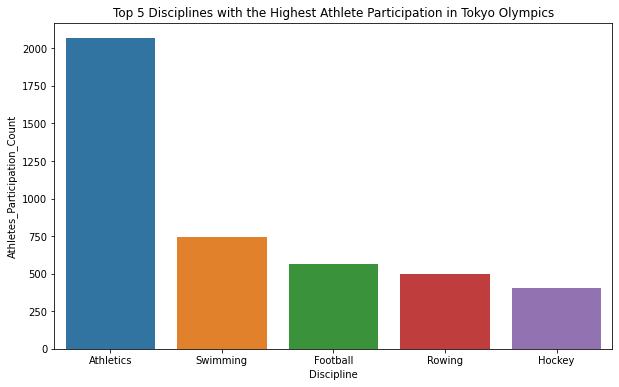

In [0]:
# Visualization of first 5 disciplies with more Athletes
df_five_discipline_athletes = (df_athletes_discipline
                               .where(sf.col("DisciplineRanking_AthletesCount").isin(1,2,3,4,5))
                               )

df_athletes_discipline_pd = df_five_discipline_athletes.toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x = "Discipline", y = "Athletes_Participation_Count", data = df_athletes_discipline_pd)
plt.title('Top 5 Disciplines with the Highest Athlete Participation in Tokyo Olympics')
plt.show()

# Most Athletes participated under "Athletics" discipline. We can observe that 35% of "Athletics" participations are participated in "Swimming" discipline.

In [0]:
# which disciplines each country participated in the most
df_country_discipline = (df_athletes
                         .dropDuplicates()
                         .groupBy("Country", "Discipline")
                         .agg(sf.count("*").alias("DisciplineCount"))
                         .withColumn("Rank", sf.rank().over(Window.partitionBy("Country").orderBy(sf.col("DisciplineCount").desc())))
                         .where("Rank == 1")
                         .drop("Rank")
                         .groupBy("Country")
                         .agg(concat_ws(', ', collect_list("Discipline")).alias("Disciplines"), sf.countDistinct("Discipline").alias("No_of_DifferentDisciplines"))
                         )

display(df_country_discipline)

# Athletes from Vietnam and Syrian Arab Republic praticipated in many disciplines than the Athletes from other countries.

Country,Disciplines,No_of_DifferentDisciplines
Afghanistan,Athletics,1
Albania,"Swimming, Weightlifting",2
Algeria,"Athletics, Boxing",2
American Samoa,Sailing,1
Andorra,"Athletics, Canoe Slalom",2
Angola,Handball,1
Antigua and Barbuda,"Athletics, Swimming",2
Argentina,Hockey,1
Armenia,Wrestling,1
Aruba,Swimming,1


In [0]:
df_coaches = (spark.read.format("csv")
               .options(header = "true", inferSchema ="true")
               .load("/mnt/tokyoolymic/raw-data/coaches.csv")
               )

# Identifying countries with more Athletes and ranking countries based on Athletes Count
df_coaches_countries = (df_coaches
                         .dropDuplicates()
                         .groupBy("Country")
                         .agg(sf.countDistinct("Name").alias("Number_of_Coaches"))
                         .withColumn("CountryRanking_CoachesCount", sf.rank().over(Window.orderBy(sf.col("Number_of_Coaches").desc())))
                         )

display(df_coaches_countries)

# Japan Coaches partcipated more than other country's coaches in Olympics.

Country,Number_of_Coaches,CountryRanking_CoachesCount
Japan,35,1
United States of America,28,2
Spain,26,3
Australia,21,4
Canada,15,5
Italy,12,6
South Africa,12,6
ROC,12,6
People's Republic of China,11,9
France,10,10


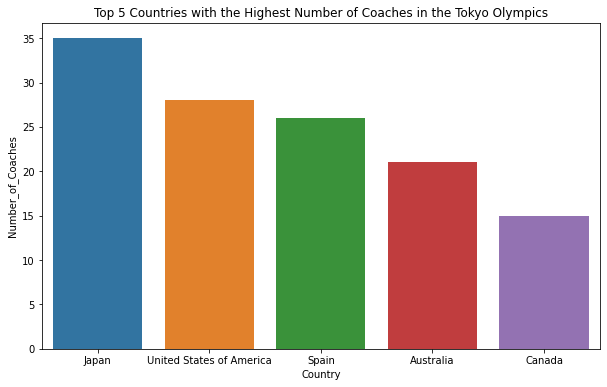

In [0]:
# Visualization of first 5 countries with more Coaches
df_five_country_coaches = (df_coaches_countries
                            .where(sf.col("CountryRanking_CoachesCount").isin(1,2,3,4,5)))

df_coaches_pd = df_five_country_coaches.toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x = "Country", y = "Number_of_Coaches", data = df_coaches_pd)
plt.title('Top 5 Countries with the Highest Number of Coaches in the Tokyo Olympics')
plt.show()

In [0]:
#disciplines having highest participation or number of Athletes participating
df_coaches_discipline = (df_coaches
                         .dropDuplicates()
                         .groupBy("Discipline")
                         .agg(sf.countDistinct("Name").alias("Coaches_Participation_Count"))
                         .withColumn("DisciplineRanking_CoachesCount", sf.rank().over(Window.orderBy(sf.col("Coaches_Participation_Count").desc())))
                         )
                         
display(df_coaches_discipline)

Discipline,Coaches_Participation_Count,DisciplineRanking_CoachesCount
Basketball,74,1
Football,59,2
Artistic Swimming,58,3
Volleyball,45,4
Hockey,44,5
Handball,29,6
Baseball/Softball,25,7
Rugby Sevens,25,7
Water Polo,22,9


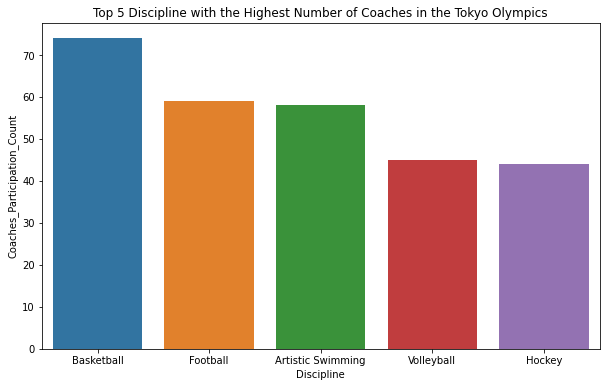

In [0]:
# Visualization of first 5 disciplies with more Coaches
df_five_discipline_coaches = (df_coaches_discipline
                               .where(sf.col("DisciplineRanking_CoachesCount").isin(1,2,3,4,5))
                               )

df_coaches_discipline_pd = df_five_discipline_coaches.toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x = "Discipline", y = "Coaches_Participation_Count", data = df_coaches_discipline_pd)
plt.title('Top 5 Discipline with the Highest Number of Coaches in the Tokyo Olympics')
plt.show()

# "Basketball" discipline has more Coaches.

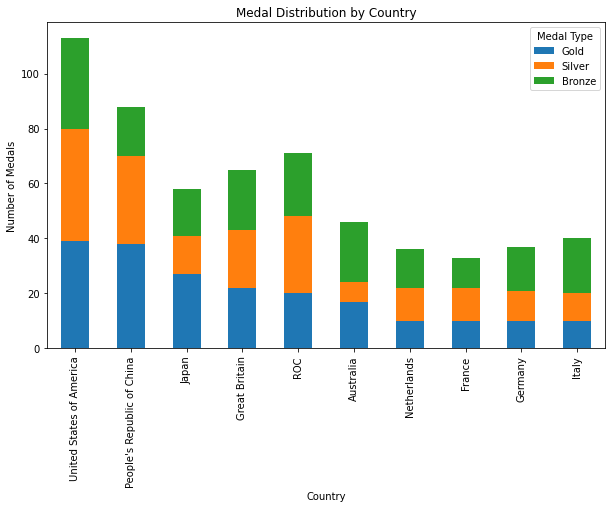

In [0]:
df_medals = (spark.read.format("csv")
               .options(header = "true", inferSchema ="true")
               .load("/mnt/tokyoolymic/raw-data/medals.csv")
               .withColumnRenamed("Rank by Total", "Rank_by_Total")
               )

df_ten_country_medals = (df_medals
                         .where(sf.col("Rank_by_Total").isin(1,2,3,4,5,6,7,8,9,10))
                         )              

df_country_medals_pd = df_ten_country_medals.toPandas()

df_country_medals_pd.set_index('Team_Country', inplace=True)
ax = df_country_medals_pd[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Medal Distribution by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Medals')
ax.legend(title='Medal Type', loc='upper right', labels=['Gold', 'Silver', 'Bronze'])
plt.show()

In [0]:
df_entriesgender = (spark.read.format("csv")
                    .options(header = "true", inferSchema ="true")
                    .load("/mnt/tokyoolymic/raw-data/entriesgender.csv")
                    )
                    
# Calculate the average percentage of entries by gender for each discipline
df_avg_entries_gender = (df_entriesgender
                         .withColumn("avg_female", sf.col("Female")/sf.col("Total"))
                         .withColumn("avg_male", sf.col("Male")/sf.col("Total"))
                          )
display(df_avg_entries_gender)

Discipline,Female,Male,Total,avg_female,avg_male
3x3 Basketball,32,32,64,0.5,0.5
Archery,64,64,128,0.5,0.5
Artistic Gymnastics,98,98,196,0.5,0.5
Artistic Swimming,105,0,105,1.0,0.0
Athletics,969,1072,2041,0.4747672709456149,0.5252327290543851
Badminton,86,87,173,0.49710982658959535,0.5028901734104047
Baseball/Softball,90,144,234,0.38461538461538464,0.6153846153846154
Basketball,144,144,288,0.5,0.5
Beach Volleyball,48,48,96,0.5,0.5
Boxing,102,187,289,0.35294117647058826,0.6470588235294118


In [0]:
df_teams = (spark.read.format("csv")
               .options(header = "true", inferSchema ="true")
               .load("/mnt/tokyoolymic/raw-data/teams.csv")
               )

# highest No of teams participated in which Event.
df_teams_discipline = (df_teams
                       .dropDuplicates()
                       .groupBy("Discipline")
                       .agg(sf.countDistinct("TeamName").alias("Teams_Participation_Count"))
                       .withColumn("DisciplineRanking_TeamsCount", sf.rank().over(Window.orderBy(sf.col("Teams_Participation_Count").desc())))
                       )

display(df_teams_discipline)

Discipline,Teams_Participation_Count,DisciplineRanking_TeamsCount
Beach Volleyball,48,1
Table Tennis,37,2
Athletics,33,3
Archery,31,4
Swimming,30,5
Football,24,6
Cycling Track,23,7
Artistic Swimming,22,8
Basketball,18,9
Handball,18,9


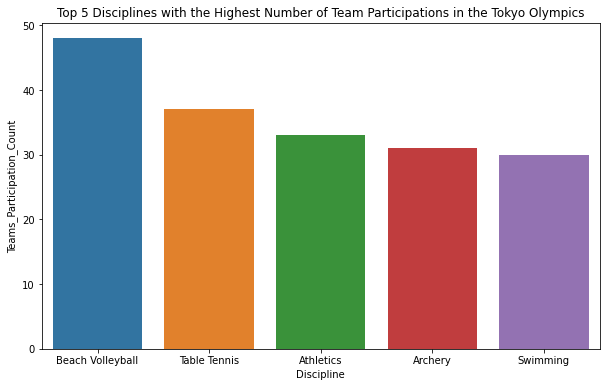

In [0]:
# Visualization of first 5 disciplies with more team partcipation
df_five_df_teams_discipline = (df_teams_discipline
                               .where(sf.col("DisciplineRanking_TeamsCount").isin(1,2,3,4,5))
                               )

df_teams_discipline_pd = df_five_df_teams_discipline.toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x = "Discipline", y = "Teams_Participation_Count", data = df_teams_discipline_pd)
plt.title("Top 5 Disciplines with the Highest Number of Team Participations in the Tokyo Olympics")
plt.show()

# More teams partcipated in "Beach Volleyball" at Tokyo Olympics.

In [0]:
df_athletes_countries.repartition(1).write.mode("overwrite").option("header", "true").format("csv").save("/mnt/tokyoolymic/transformed-data/athletes_countries")

In [0]:
df_athletes_discipline.repartition(1).write.mode("overwrite").option("header", "true").format("csv").save("/mnt/tokyoolymic/transformed-data/athletes_discipline")

In [0]:
df_country_discipline.repartition(1).write.mode("overwrite").option("header", "true").format("csv").save("/mnt/tokyoolymic/transformed-data/country_discipline")

In [0]:
df_coaches_countries.repartition(1).write.mode("overwrite").option("header", "true").format("csv").save("/mnt/tokyoolymic/transformed-data/coaches_countries")

In [0]:
df_coaches_discipline.repartition(1).write.mode("overwrite").option("header", "true").format("csv").save("/mnt/tokyoolymic/transformed-data/coaches_discipline")

In [0]:
df_medals.repartition(1).write.mode("overwrite").option("header", "true").format("csv").save("/mnt/tokyoolymic/transformed-data/medals")

In [0]:
df_avg_entries_gender.repartition(1).write.mode("overwrite").option("header", "true").format("csv").save("/mnt/tokyoolymic/transformed-data/avg_entries_gender")

In [0]:
df_teams_discipline.repartition(1).write.mode("overwrite").option("header", "true").format("csv").save("/mnt/tokyoolymic/transformed-data/teams_discipline")